In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#for combining panda dataframes
from functools import reduce

#for z normalisation
from sklearn.preprocessing import StandardScaler
#for dataset splitting
from sklearn.model_selection import train_test_split
#for precision/ recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#for AI model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu

#import utils from Coursera course
##from assigment_utils import *



In [3]:
#load & inspect data
#Load data
dat = pd.read_csv(r"C:\Users\schei\OneDrive\Dokumente\Programmieren\AAA_Machine Learning Specialisation by Andrew Ng - Coursera\Own Code\Data\luis-daten.csv",
sep=";")

#Get data types right
dat['Date'] = dat['Date'].astype("datetime64")
dat['Value'] = dat["Value"].astype("float64")

print(dat.shape)
dat.head(5)

(4331, 5)


,Date,Time,Value,Measure,Location
0,2021-02-01,00:00,-0.563162,LUTE (Lufttemperatur) [°;C],Graz-Ost
1,2021-03-01,00:00,1.959388,LUTE (Lufttemperatur) [°;C],Graz-Ost
2,2021-04-01,00:00,3.186550,LUTE (Lufttemperatur) [°;C],Graz-Ost
3,2021-05-01,00:00,2.917329,LUTE (Lufttemperatur) [°;C],Graz-Ost
4,2021-06-01,00:00,2.696276,LUTE (Lufttemperatur) [°;C],Graz-Ost


In [4]:
#data wrangling
#Align temperature, humidity and PM10 per day
#Split dataframes
temp = dat[dat["Measure"] == "LUTE (Lufttemperatur) [°;C]"]
humi = dat[dat["Measure"] == "LUFE (Relative Luftfeuchte) [%]"]
pm10 = dat[dat['Measure'] == "PM10 (Feinstaub) [µ;g/m³;]"] 

#set index on location and date (otherwise multiple entries on same date)
temp.set_index(["Location", "Date"], inplace=True)
humi.set_index(["Location", "Date"], inplace=True)
pm10.set_index(["Location", "Date"], inplace=True)

dfs = [temp, humi, pm10]
#combine based on index
dat = reduce(lambda  left,right: pd.merge(left,right,left_index=True,
                                            right_index= True,
                                            how='inner'), dfs)

#rename columns
dat.rename(columns={'Value_x':'Temperature', 'Value_y':'Humidity', 'Value':"PM10"},
    inplace= True)

#reset index
dat.reset_index(inplace=True)

#according to WHO, max. PM10 for 24h is 45u per g/m3
#classification: if value of PM10 is higher than 45, positive

dat.loc[dat["PM10"] >= 45, "Class"] = 1
dat.loc[dat["PM10"] < 45, "Class"] = 0

print(dat.shape)
dat.head(5)

(1433, 12)


,Location,Date,Time_x,Temperature,Measure_x,Time_y,Humidity,Measure_y,Time,PM10,Measure,Class
0,Graz-Ost,2021-02-01,00:00,-0.563162,LUTE (Lufttemperatur) [°;C],00:00,97.71438,LUFE (Relative Luftfeuchte) [%],00:00,42.370000,PM10 (Feinstaub) [µ;g/m³;],0.0
1,Graz-Ost,2021-03-01,00:00,1.959388,LUTE (Lufttemperatur) [°;C],00:00,100.00000,LUFE (Relative Luftfeuchte) [%],00:00,29.010008,PM10 (Feinstaub) [µ;g/m³;],0.0
2,Graz-Ost,2021-04-01,00:00,3.186550,LUTE (Lufttemperatur) [°;C],00:00,100.00000,LUFE (Relative Luftfeuchte) [%],00:00,20.789991,PM10 (Feinstaub) [µ;g/m³;],0.0
3,Graz-Ost,2021-05-01,00:00,2.917329,LUTE (Lufttemperatur) [°;C],00:00,100.00000,LUFE (Relative Luftfeuchte) [%],00:00,19.580004,PM10 (Feinstaub) [µ;g/m³;],0.0
4,Graz-Ost,2021-06-01,00:00,2.696276,LUTE (Lufttemperatur) [°;C],00:00,99.93652,LUFE (Relative Luftfeuchte) [%],00:00,16.590008,PM10 (Feinstaub) [µ;g/m³;],0.0


In [5]:
#get X and y - as np array not as pd dataframe
X = dat[['Temperature', 'Humidity']]
y = dat["Class"].to_numpy()

#check shapes
print("The shape of X is: " + str(X.shape))
print("The shape of y is: " + str(y.shape))

The shape of X is: (1433, 2)
The shape of y is: (1433,)


Text(0.5, 1.0, 'Class 1')

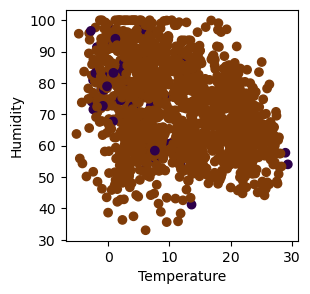

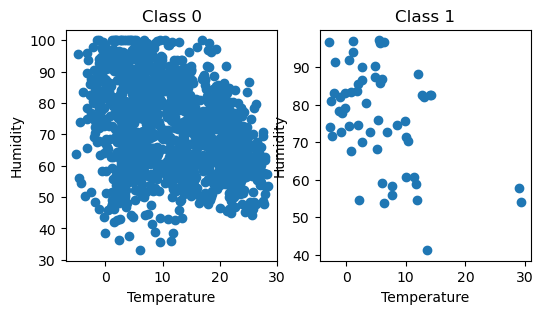

In [15]:
#visualise data
##plot two features with both classes in one graph
fig, (ax1) = plt.subplots(1, 1, figsize = (3, 3))
ax1.scatter(dat["Temperature"], dat["Humidity"], c = dat["Class"], cmap="PuOr")
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Humidity")

##plot two features with both classes in one graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 3))
ax1.scatter(dat[dat["Class"] == 0]["Temperature"], dat[dat["Class"] == 0]["Humidity"])
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Humidity")
ax1.set_title("Class 0")
ax2.scatter(dat[dat["Class"] == 1]["Temperature"], dat[dat["Class"] == 1]["Humidity"])
ax2.set_xlabel("Temperature")
ax2.set_ylabel("Humidity")
ax2.set_title("Class 1")


In [65]:
#check imbalance of data set
##ratio of positives
print("Ratio of positives: " + str(dat[dat['Class'] == 1].count()[-1] / dat.shape[0]))
print("Ratio of negatives: " + str(dat[dat['Class'] == 0].count()[-1] / dat.shape[0]))


Ratio of positives: 0.03977669225401256
Ratio of negatives: 0.9602233077459874


X_train.shape (859, 2) y_train.shape (859,)
X_cv.shape (287, 2) y_cv.shape (287,)
X_test.shape (287, 2) y_test.shape (287,)


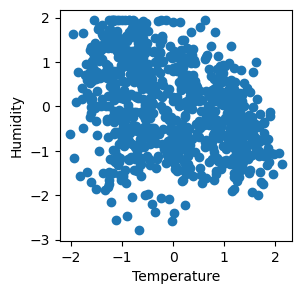

In [7]:
#Split data
#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)


#standardise data
sdt_scaler = StandardScaler()
#fit scaler to training set and transform it
X_trainNorm = pd.DataFrame(sdt_scaler.fit_transform(X_train), columns = X_train.columns)
##transfer scale on other data sets
X_cvNorm = pd.DataFrame(sdt_scaler.transform(X_cv), columns = X_cv.columns)
X_testNorm = pd.DataFrame(sdt_scaler.transform(X_test), columns = X_test.columns)

fig, (ax1) = plt.subplots(1, 1, figsize = (3, 3))
ax1.scatter(X_trainNorm["Temperature"], X_trainNorm["Humidity"])
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Humidity")

#convert back to numpy form
X_trainNorm = X_trainNorm.to_numpy()
X_cvNorm = X_cvNorm.to_numpy()
X_testNorm = X_testNorm.to_numpy()

In [101]:
#create and train softmax classification mode

#build model
model = Sequential([
    #input layer
    #tf.keras.Input(shape=(859,2)),
    #hidden layer
    ##inlcude regularisation
    tf.keras.layers.Dense(units = 8, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(units = 6, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(units = 3, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    #output layer, linear for from logits calculation
    tf.keras.layers.Dense(units = 1, activation="linear")
], name = "My_first_model"
)

In [39]:
#to call model summary, input layer needs to be specified
model.summary()

Model: "My_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 859, 6)            18        
                                                                 
 dense_8 (Dense)             (None, 859, 3)            21        
                                                                 
 dense_9 (Dense)             (None, 859, 1)            4         
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [102]:
#Compile model
##Binary Classification (higher than WHO or not)
##Adam optimiser to allow for individual learning rates
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

In [104]:
#train model
#tf.reshape(X_train, [859, 2])
history = model.fit(X_trainNorm, y_train, epochs=100)

Epoch 1/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1801
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1796
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1792
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1787
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1782
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1779
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1775
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1771
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1767
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 11/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1762
Epoch 12/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1758
Epoch 13/100
27/27 [=================

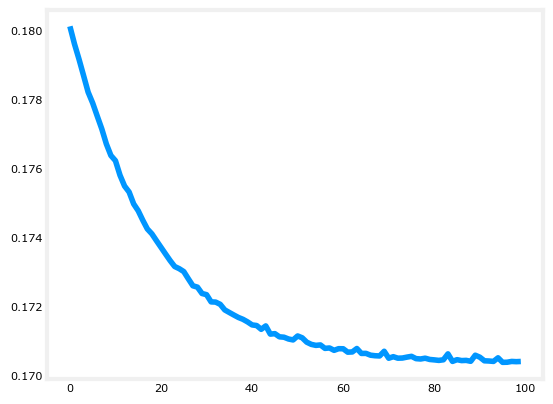

In [105]:
#Diagnosis
##check whether learning curve flattens
plt.plot(history.history['loss'])

In [106]:
#Errors
J_train = model.evaluate(X_trainNorm, y_train, batch_size=128)
J_cv = model.evaluate(X_cvNorm, y_cv, batch_size=128)


3/3 [==============================] - 0s 2ms/step - loss: 0.1846


In [107]:
#Precision and recall
threshold = 0.5
##On cv set
yhat = model.predict(X_cvNorm)
#not probabilities, but inputs for softmax function
##for precision score to work, I need to round to make sure it's binary
yhat = tf.nn.softmax(yhat).numpy()
yhat = np.where(yhat >= threshold, 1, 0)
#reduce dimension
yhat = yhat[:, 0]
#change data type to float64
yhat = yhat.astype("float64")

precision = precision_score(y_cv, yhat)
recall = recall_score(y_cv, yhat)

9/9 [==============================] - 0s 2ms/step


In [109]:
print("Precision after regularisation = " + str(precision))
print("Recall after regularisation = " + str(recall))
#Recall shows, that algorithm predicts everything as 1



Precision after regularisation = 0.04529616724738676
Recall after regularisation = 1.0
